In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
train.shape

(614, 13)

In [6]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
Gen_Lstat = pd.crosstab(train.Gender,train.Loan_Status)

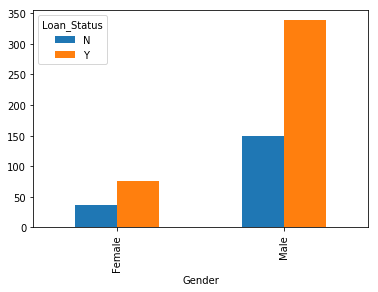

In [9]:
Gen_Lstat.plot(kind='bar')

In [10]:
train['Gender'].mode()

0    Male
dtype: object

In [11]:
Gen_Edu = pd.crosstab(train.Gender,train.Education)

In [12]:
Gen_Edu

Education,Graduate,Not Graduate
Gender,,
Female,92,20
Male,376,113


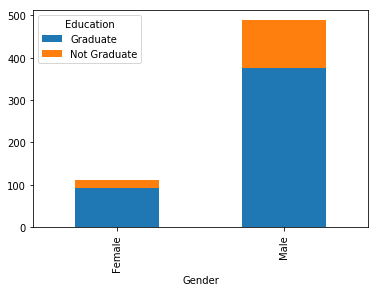

In [13]:
Gen_Edu.plot.bar(stacked=True)

In [14]:
Gen_SEmp = pd.crosstab(train.Gender,train.Self_Employed)

In [15]:
Gen_SEmp

Self_Employed,No,Yes
Gender,,
Female,89,15
Male,402,63


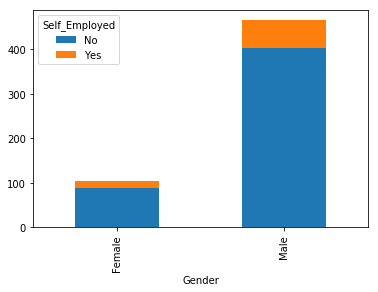

In [16]:
Gen_SEmp.plot.bar(stacked=True)

In [44]:
train['Gender'].fillna('Male',inplace=True)
test['Gender'].fillna('Male',inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [19]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [45]:
train['Married'].fillna('Yes',inplace=True)
test['Married'].fillna('Yes',inplace=True)

In [21]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
mar_Dep = pd.crosstab(train.Dependents,train.Married)

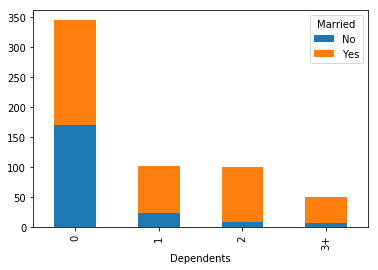

In [23]:
mar_Dep.plot.bar(stacked=True)

In [24]:
edu_Dep = pd.crosstab(train.Dependents,train.Education)

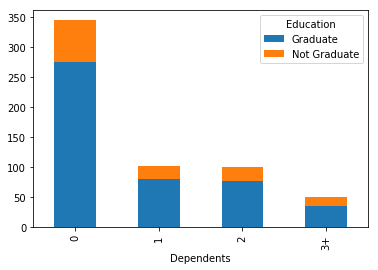

In [25]:
edu_Dep.plot.bar(stacked=True)

In [26]:
SEmp_Dep = pd.crosstab(train.Dependents,train.Self_Employed)

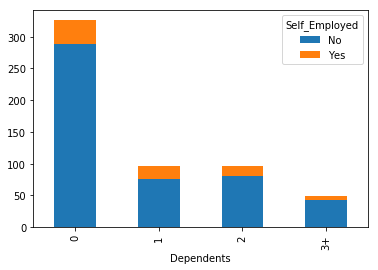

In [27]:
SEmp_Dep.plot.bar(stacked=True)

In [46]:
train['Dependents'].fillna(0,inplace=True)
test['Dependents'].fillna(0,inplace=True)

In [29]:
SEmp_edu = pd.crosstab(train.Self_Employed,train.Education)

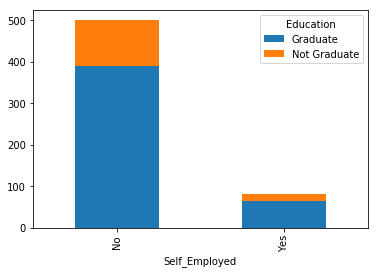

In [30]:
SEmp_edu.plot.bar(stacked=True)

In [31]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [47]:
train['Self_Employed'].fillna('No',inplace=True)
test['Self_Employed'].fillna('No',inplace=True)

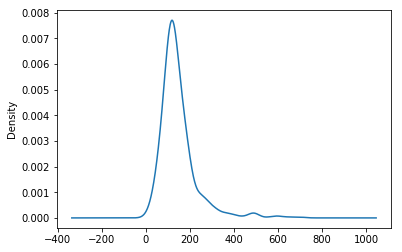

In [33]:
train['LoanAmount'].plot.kde()

In [48]:
train['LoanAmount'].fillna(train.groupby('Dependents')['LoanAmount'].transform('mean'),inplace=True)
test['LoanAmount'].fillna(test.groupby('Dependents')['LoanAmount'].transform('mean'),inplace=True)

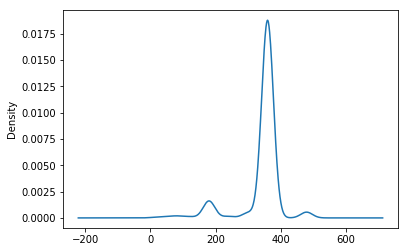

In [35]:
train['Loan_Amount_Term'].plot.kde()

In [36]:
train['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [37]:
train.groupby('Dependents')['Loan_Amount_Term'].mean()

Dependents
0     355.714286
0     348.107784
1     329.346535
2     340.871287
3+    325.200000
Name: Loan_Amount_Term, dtype: float64

In [49]:
train['Loan_Amount_Term'].fillna(train.groupby('Dependents')['Loan_Amount_Term'].transform('mean'),inplace=True)
test['Loan_Amount_Term'].fillna(test.groupby('Dependents')['Loan_Amount_Term'].transform('mean'),inplace=True)

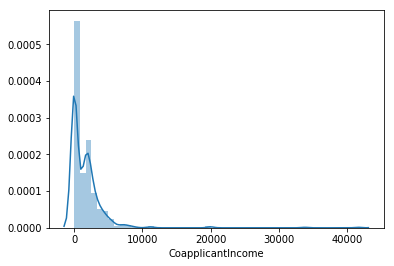

In [131]:
sns.distplot(train['CoapplicantIncome'])

In [39]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [50]:
train['Credit_History'].fillna(1.0, inplace=True)
test['Credit_History'].fillna(1.0, inplace=True)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [43]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             5
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           208
Loan_Amount_Term      14
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [44]:
train['Loan_Amount_Term'].value_counts()

360.000000    512
180.000000     44
480.000000     15
300.000000     13
348.107784     11
84.000000       4
240.000000      4
120.000000      3
36.000000       2
60.000000       2
329.346535      1
325.200000      1
355.714286      1
12.000000       1
Name: Loan_Amount_Term, dtype: int64

In [51]:
cat = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area']
for i in cat:
    train[i] = train[i].astype('str')
    test[i] = test[i].astype('str')
    

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 62.4+ KB


In [52]:
X_train = train.drop(['Loan_ID','Loan_Status'], axis=1)
y_train = train['Loan_Status']

X_test = test.drop(['Loan_ID'], axis=1)

In [114]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train_cat = X_train.select_dtypes(exclude=[np.number])
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_cat = X_test.select_dtypes(exclude=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

In [54]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder(handle_unknown='ignore')
X_train_oh = oh.fit_transform(X_train_cat).toarray()
X_test_oh = oh.transform(X_test_cat).toarray()

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_numeric)
X_test_sc = sc.transform(X_test_numeric)

In [56]:
X_train_final = np.hstack((X_train_oh,X_train_sc))
X_test_final = np.hstack((X_test_oh,X_test_sc))

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_final, y_train)
print('training score',lr.score(X_train_final,y_train))
# print('test score',lr.score(X_test_final,y_test))

training score 0.8127035830618893


In [61]:
pred_lr = lr.predict(X_test_final)
pred_lr = pd.Series(pred_lr)
pred_lr

0      Y
1      Y
2      Y
3      Y
4      Y
5      Y
6      Y
7      N
8      Y
9      Y
10     Y
11     Y
12     Y
13     N
14     Y
15     Y
16     Y
17     Y
18     Y
19     Y
20     Y
21     Y
22     Y
23     Y
24     Y
25     N
26     Y
27     Y
28     Y
29     Y
      ..
337    Y
338    Y
339    N
340    Y
341    Y
342    Y
343    Y
344    Y
345    Y
346    N
347    Y
348    Y
349    Y
350    Y
351    Y
352    Y
353    Y
354    N
355    Y
356    Y
357    Y
358    Y
359    Y
360    Y
361    Y
362    Y
363    Y
364    Y
365    Y
366    Y
Length: 367, dtype: object

In [62]:
submit=test['Loan_ID'].to_frame()
submit['Loan_Status']=pred_lr

In [66]:
submit.to_csv('submit.csv',index=False)

In [22]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

print('f1 score',f1_score(y_train,lr.predict(X_train_final),average='weighted'))
print(confusion_matrix(y_train,lr.predict(X_train_final)))
# print('f1 score',f1_score(y_test,lr.predict(X_test_final),average='weighted'))
# print(confusion_matrix(y_test,lr.predict(X_test_final)))

f1 score 0.7892903928861158
[[ 84 108]
 [  7 415]]


In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train_final, y_train)
print('training score',dt.score(X_train_final,y_train))
# print('test score',dt.score(X_test_final,y_test))

training score 0.8224755700325733


In [122]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,max_depth=2)
rf.fit(X_train_final, y_train)
print('training score',rf.score(X_train_final,y_train))
print('test score',rf.score(X_test_final,y_test))

training score 0.814663951120163
test score 0.7886178861788617


In [123]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_final, y_train)
print('training score',knn.score(X_train_final,y_train))
print('test score',knn.score(X_test_final,y_test))

training score 0.7841140529531568
test score 0.7642276422764228


In [124]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
train_poly = poly.fit_transform(X_train_final)
test_poly = poly.transform(X_test_final)

In [125]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_poly, y_train)
print('training score',lr.score(train_poly,y_train))
print('test score',lr.score(test_poly,y_test))

training score 0.9592668024439919
test score 0.7154471544715447


C:\Users\Maulin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [130]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(alpha=1,loss='log')
sgd.fit(train_poly, y_train)
print('training score',sgd.score(train_poly,y_train))
print('test score',sgd.score(test_poly,y_test))

training score 0.8757637474541752
test score 0.7723577235772358


In [97]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,max_depth=2)
rf.fit(train_poly, y_train)
print('training score',rf.score(train_poly,y_train))
print('test score',rf.score(test_poly,y_test))

training score 0.814663951120163
test score 0.7886178861788617
